In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 
import plotly.express as px

<h2> Load the breast cancer dataset

In [2]:
from sklearn.datasets import load_breast_cancer

In [5]:
cancer = load_breast_cancer()

cancer_data = cancer.data
cancer_target = cancer.target

In [8]:
df = pd.DataFrame(cancer_data , columns = cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
df['target'] = cancer_target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [12]:
# Center the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cancer_data = scaler.fit_transform(cancer_data)

In [13]:
# Apply PCA 
from sklearn.decomposition import PCA

pca = PCA(n_components = 8) # take first 8 components

In [14]:
pca_cancer_data = pca.fit_transform(cancer_data)

In [15]:
cancer_target = cancer_target.reshape(-1 , 1)

Text(0, 0.5, 'second principal component')

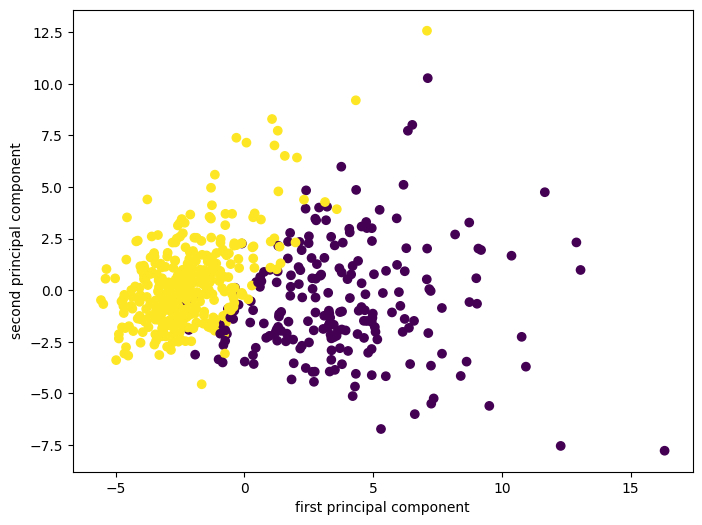

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(pca_cancer_data[:,0],pca_cancer_data[:,1], c=cancer_target[:,0])
plt.xlabel('first principal component')
plt.ylabel('second principal component')

In [17]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724])

In [18]:
pca.components_.shape # total 8 vectors and each vector has 30 components

(8, 30)

In [26]:
cummulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

In [27]:
cummulative_explained_variance

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254])

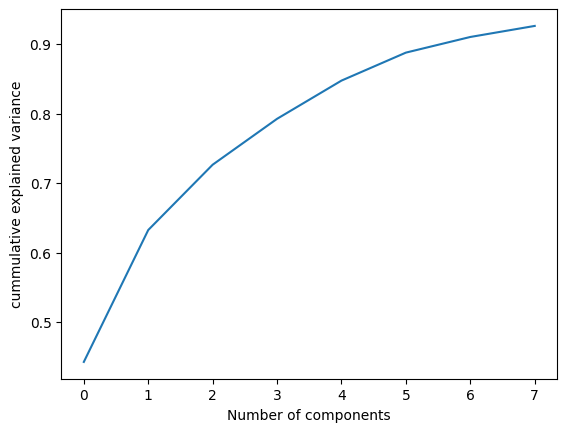

In [28]:
plt.plot(cummulative_explained_variance)
plt.xlabel("Number of components")
plt.ylabel("cummulative explained variance")
plt.show()

In [20]:
pca.explained_variance_.shape

(8,)

<h2 style = "color: green;">Types Of PCA</h2>

<h3 style = "color:blue">Kernel PCA </h3>

#### What is Kernel PCA?

`Kernel Principal Component Analysis (Kernel PCA or KPCA)` is a `non-linear` extension of the traditional Principal Component Analysis (PCA). While `standard PCA` is designed to find `linear relationships` and project data onto lower-dimensional linear subspaces, Kernel PCA uses a technique called the `kernel trick` to handle `non-linearly separable data`.

---
1.  `Implicit Mapping to a Higher-Dimensional Space:` Instead of directly working with the original features, Kernel PCA implicitly maps the data into a much higher-dimensional (possibly infinite-dimensional) feature space using a `kernel function`.
2.  `Linear PCA in the Transformed Space:` In this higher-dimensional space, the data points that were non-linearly separable in the original space might become linearly separable. Kernel PCA then performs standard linear PCA in this new, transformed feature space.
3.  `The "Kernel Trick":` The magic is that we don't actually need to explicitly calculate the coordinates of the data points in this high-dimensional space. The kernel function allows us to compute the dot products between these transformed data points directly from their original representations. This saves immense computational cost and makes it feasible to work in very high (or infinite) dimensional spaces.

Common kernel functions used include:
* `Polynomial kernel:` $k(x, y) = (x \cdot y + c)^d$
* `Radial Basis Function (RBF) / Gaussian kernel:` $k(x, y) = \exp(-\gamma ||x - y||^2)$
* `Sigmoid kernel:` $k(x, y) = \tanh(\alpha (x \cdot y) + \beta)$
--- 
#### When to Use Kernel PCA?
consider using Kernel PCA primarily when:

1.  `Data exhibits non-linear relationships:` This is the most common and compelling reason. If a simple linear boundary or projection (which standard PCA creates) cannot effectively separate or capture the underlying structure of your data, Kernel PCA offers a powerful alternative. Think of data shaped like `concentric circles or spirals` standard PCA would struggle to reduce the dimensionality while preserving the separation, but Kernel PCA can "unroll" such shapes.
2. `Traditional PCA performs poorly:` If standard PCA for dimensionality reduction, visualization, or as a pre-processing step for other algorithms, and the results are not satisfactory (e.g., poor clustering, low classification accuracy after reduction), it might indicate non-linearities that Kernel PCA can address.
3.  `You need non-linear feature extraction:` Beyond just dimensionality reduction, Kernel PCA can extract new, non-linear features that better represent the underlying patterns in complex datasets. These new features can then be used as input for other machine learning models, potentially improving their performance.
4.  `Data visualization of complex structures:` For high-dimensional data with intricate non-linear structures, projecting it down to 2 or 3 dimensions using Kernel PCA can reveal patterns that are invisible with linear methods.

#### Why Use Kernel PCA?

Here's why Kernel PCA is a valuable tool:

### Why Use Kernel PCA?

Here's why Kernel PCA is a valuable tool:

* **Captures Non-linear Patterns**: The primary advantage is its ability to uncover and utilize **non-linear relationships** in the data. Traditional PCA assumes linear relationships, which can lead to significant information loss or ineffective dimensionality reduction when the true data structure is non-linear.
* **Enhanced Dimensionality Reduction**: By transforming data into a higher-dimensional space where linear separation might be possible, Kernel PCA can achieve more effective dimensionality reduction for complex datasets. It preserves more of the "important" variance that relates to non-linear structures.
* **Improved Model Performance**: When used as a pre-processing step, the **non-linear features** extracted by Kernel PCA can lead to better performance for subsequent machine learning tasks like classification, clustering, or regression, as the transformed data often provides a more discriminative representation.
* **Flexibility with Kernel Choice**: The choice of kernel allows for flexibility in how non-linear relationships are modeled. Different kernels can capture different types of non-linearities, giving you the ability to tailor the method to your specific data.
* **Robustness to Outliers and Noise**: By considering the global structure of the data through the **kernel trick**, KPCA can sometimes be more robust to outliers and noise compared to methods that focus solely on local distances.

However, it's important to note that Kernel PCA can be computationally more expensive for very large datasets, and the choice of the appropriate kernel and its parameters (e.g., $\gamma$ for RBF kernel, $d$ for polynomial kernel) can be crucial and often requires experimentation or cross-validation.
However, it's important to note that Kernel PCA can be computationally more expensive for very large datasets, and the choice of the 
appropriate kernel and its parameters (e.g., $\gamma$ for RBF kernel, $d$ for polynomial kernel) can be crucial and often requires 
experimentation or cross-validation.

### Code example Kernel PCA

In [29]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler

In [30]:
X, y = make_circles(n_samples = 400, factor = 0.3, noise = 0.05, random_state = 42)

In [33]:
# 1.Standardize the data - important for PCA and Kernel PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
# 2. Apply Standard PCA
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

In [37]:
# 3. Apply Kernel PCA
# use a Radial Basis Function (RBF) kernel, which is good for
# separating concentric circles. The 'gamma' parameter controls the
# influence of a single training example.
kpca = KernelPCA(n_components = 2, kernel = "rbf", gamma = 10) # Increase gamma if not seperate with low gamma
X_kpca = kpca.fit_transform(X_scaled)

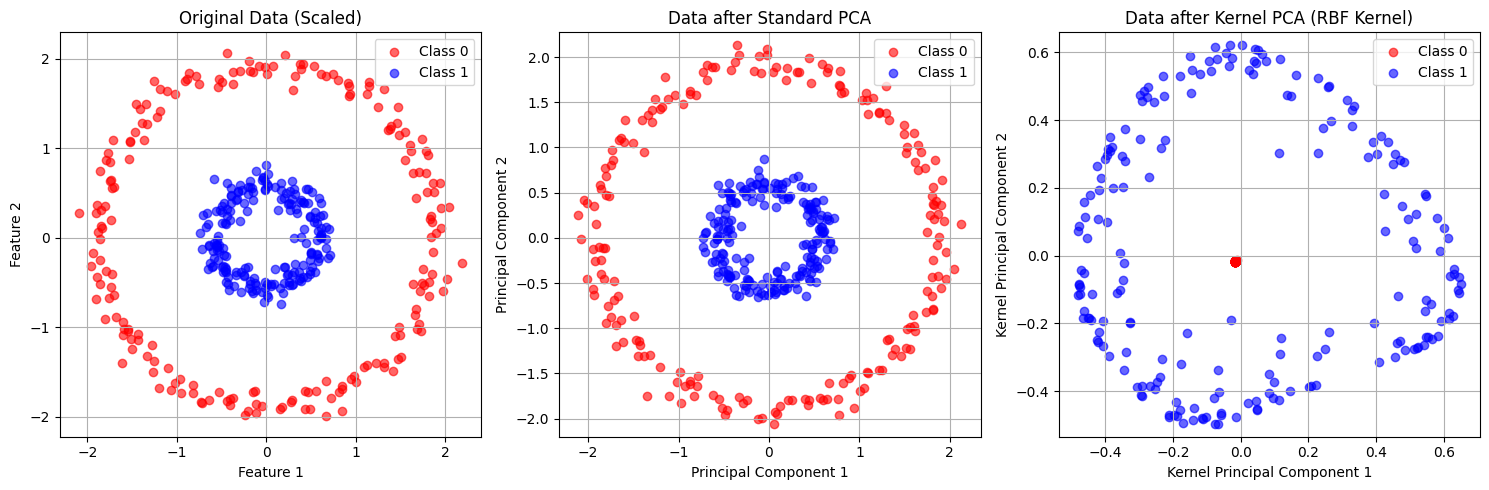

In [38]:
# 4. Visualize the results

plt.figure(figsize=(15, 5))

# Original Data
plt.subplot(1, 3, 1)


plt.scatter(X_scaled[y == 0, 0], X_scaled[y == 0, 1], color='red', alpha=0.6, label='Class 0')
plt.scatter(X_scaled[y == 1, 0], X_scaled[y == 1, 1], color='blue', alpha=0.6, label='Class 1')

plt.title("Original Data (Scaled)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.axis('equal')

# Data after Standard PCA
plt.subplot(1, 3, 2)
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', alpha=0.6, label='Class 0')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', alpha=0.6, label='Class 1')

plt.title("Data after Standard PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.axis('equal')

# Data after Kernel PCA
plt.subplot(1, 3, 3)
plt.scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], color='red', alpha=0.6, label='Class 0')
plt.scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], color='blue', alpha=0.6, label='Class 1')

plt.title("Data after Kernel PCA (RBF Kernel)")
plt.xlabel("Kernel Principal Component 1")
plt.ylabel("Kernel Principal Component 2")
plt.legend()
plt.grid(True)
plt.axis('equal')

plt.tight_layout()
plt.show()

<h3 style = "color:blue">Sparse  PCA </h3>

`Sparse Principal Component Analysis (Sparse PCA)` is a variant of the traditional Principal Component Analysis (PCA) that adds a 
`sparsity` constraint to the principal components. While standard PCA aims to find `orthogonal components` that capture the maximum variance, 
`Sparse PCA` goes a step further by ensuring that these components are `built from only a few of the original features`.This means that the 
loading vectors for each component will have many zero (or near-zero) values.
 
--- 
***When to Use Sparse PCA?*** 

- `Interpretability is Key`: If we need to understand which `specific original features` are driving each principal component. Standard PCA 
   components are typically dense linear combinations of all original features, which can be hard to interpret. Sparse PCA makes this          clearer by highlighting only the most influential features for each component.

- `High-Dimensional Data with Redundancy`: In datasets with a `very large number of features`, many of which might be `irrelevant or highly 
   correlated`, Sparse PCA can help in implicitly performing `feature selection` by setting the loadings of less important features to zero.

- `Noise Reduction`: By focusing only on a subset of features for each component, Sparse PCA can be more robust to noise present in the        less contributing features.

- `Feature Engineering`: When we want to derive new features that are sparse combinations of the original ones, potentially for use in 
   downstream models that benefit from sparser inputs.

--- 
`Why Use Sparse PCA?`

-`Enhanced Interpretability`: This is the biggest advantage. A sparse component vector means that only a handful of the original features 
  contribute significantly to that component. This makes it much easier for domain experts to understand the meaning and drivers behind       each principal component. `For example`, if a component related to customer churn is sparse, it might clearly show that only "customer service calls" and "account age" are the main factors, rather than a combination of 50 different obscure variables.
  
- `Implicit Feature Selection:` Because many loadings are pushed to zero, Sparse PCA inherently performs a form of feature selection.
   Features with `zero loadings` are effectively excluded from the `component's calculation`, reducing the dimensionality and potentially      improving model performance by removing noise.
  
- `Computational Efficiency (in some cases)`: While the optimization problem for `Sparse PCA` is more complex than `standard PCA`, the
   resulting sparse components can sometimes lead to more efficient computations in subsequent steps, especially for very high-dimensional
   data where working with dense matrices is costly.

In [39]:
from sklearn.decomposition import SparsePCA
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

In [40]:
# 1. Generate a synthetic dataset
X, _ = make_regression(n_samples = 300, n_features = 10, n_informative = 3,
                       n_targets = 1, random_state = 42, noise = 10)

In [41]:
# Standardize the data - essential for PCA and its variants
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
# 2. Apply Standard PCA
# extract 3 components to align with the number of informative features.
pca = PCA(n_components = 3, random_state = 42)
X_pca = pca.fit_transform(X_scaled)

In [43]:
# 3. Apply Sparse PCA
# 'alpha' parameter controls the sparsity level. A higher alpha encourages more zeros.
# tune 'alpha' based on your dataset and desired sparsity.
sparse_pca = SparsePCA(n_components = 3, alpha = 1.0, max_iter = 1000, random_state = 42)
X_sparse_pca = sparse_pca.fit_transform(X_scaled)

In [44]:
print(np.round(pca.components_, 3))

[[-0.119  0.255  0.28  -0.114 -0.103 -0.456  0.52   0.427 -0.041 -0.397]
 [-0.43  -0.043 -0.285 -0.17   0.261  0.118  0.285 -0.398  0.501 -0.361]
 [-0.289 -0.331  0.313 -0.128  0.615 -0.347  0.043 -0.017 -0.115  0.422]]


In [45]:
print(np.round(sparse_pca.components_, 3))

[[ 0.     0.     0.545  0.     0.    -0.474  0.     0.623 -0.298  0.   ]
 [-0.    -0.    -0.    -0.    -0.     0.221 -0.706 -0.    -0.047  0.671]
 [ 0.707 -0.    -0.    -0.    -0.707 -0.    -0.    -0.    -0.    -0.   ]]


In [ ]:
print(np.round(sparse_pca., 3))

<h4 style = "color:blue">Note: </h4>

- Here we can see columns(features) which was redundant these columns principle components become zero also their eigen vectors become zero.

<h3 style = "color:blue">Randomized  PCA </h3>

`Randomized Principal Component Analysis (Randomized PCA)` is an approximation algorithm for PCA. Unlike the exact, `full Singular Value 
Decomposition(SVD)` methods used in traditional PCA (especially for dense matrices), `Randomized PCA` employs a randomized algorithm to 
quickly find a low-rank approximation of the data's singular value decomposition. This makes it particularly `efficient for large datasets` 
where calculating the full SVD would be computationally prohibitive or memory-intensive.

--- 
#### The core idea is to find the principal components more efficiently by:

1.`Randomized Sampling`: Instead of operating on the entire dataset, it uses random projections to identify a subspace that captures most     of the data's variance.
2. `Fast Decomposition`: It then performs a more computationally tractable decomposition(like SVD) on this smaller, projected data.

--- 
#### When to Use Randomized PCA?

- `Large Datasets`: This is its primary use case. If your dataset has a very `large number of samples` (n_samples) or a very large number
   of features (n_features), especially if both are large, Randomized PCA can significantly `speed up` the computation of principal
   components compared to the `full SVD solver`.
- `Dimensionality Reduction to a Small Number of Components`: Randomized PCA is most effective when you only need to extract a small number
   of principal components relative to the total number of features or samples. If you need to retain almost all components, the benefits
   might diminish.
- `Approximate Solution is Acceptable`: While highly accurate, Randomized PCA provides an approximation of the exact PCA solution. For many 
   machine learning tasks, this approximation is more than sufficient and the computational gains outweigh the negligible loss in precision.
--- 
#### Why Use Randomized PCA?

- `Computational Efficiency`: It offers a `dramatic speedup` for large-scale problems, making PCA feasible for datasets that would otherwise
   be too slow or memory-intensive to process with exact methods. This is crucial in big data scenarios.

- `Memory Efficiency`: By avoiding the direct computation and storage of the full covariance matrix (which can be very large), Randomized
   PCA is more memory-friendly, especially for datasets with many features.

- `Scalability`: It scales much better with increasing data size compared to full SVD, allowing to handle larger problems without needing 
   excessive computational resources.

---

In [47]:
from sklearn.datasets import make_classification 
# 1. Generate a large synthetic dataset
n_samples = 10000
n_features = 500

X, y = make_classification(
         n_samples=n_samples, n_features=n_features,
         n_informative=50, n_redundant=0, n_repeated=0,
         n_classes=2, n_clusters_per_class=1, random_state=42
         )

In [48]:
print(f"Dataset shape: {X.shape}")

Dataset shape: (10000, 500)


In [49]:
# Standardize the data - essential for PCA and its variants
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [50]:
# Number of components to extract (a small number relative to n_features)
n_components_to_keep = 50

In [53]:
import time
# 2. Apply Standard PCA (using 'full' SVD solver implicitly or explicitly)
start_time_full = time.time()

pca_full = PCA(n_components = n_components_to_keep, svd_solver = 'full', random_state = 42)
X_pca_full = pca_full.fit_transform(X_scaled)

end_time_full = time.time()

In [54]:
time_full = end_time_full - start_time_full

print(f"Time taken for Full PCA: {time_full:.4f} seconds")

Time taken for Full PCA: 0.8706 seconds


In [55]:
print("Explained variance ratio (Full PCA, first 5 components):",
      np.round(pca_full.explained_variance_ratio_[ : 5] , 4)
     )

Explained variance ratio (Full PCA, first 5 components): [0.0063 0.0056 0.0047 0.0044 0.0043]


In [56]:
print("Cumulative explained variance ratio (Full PCA):",
      np.round(np.cumsum(pca_full.explained_variance_ratio_)[-1], 4)
     )

Cumulative explained variance ratio (Full PCA): 0.158


In [57]:
# 3. Apply Randomized PCA
start_time_randomized = time.time()

pca_randomized = PCA(n_components = n_components_to_keep, svd_solver = 'randomized', random_state = 42)
X_pca_randomized = pca_randomized.fit_transform(X_scaled)

end_time_randomized = time.time()

In [58]:
time_randomized = end_time_randomized - start_time_randomized
print(f"Time taken for Randomized PCA: {time_randomized:.4f} seconds")

Time taken for Randomized PCA: 0.5341 seconds


In [59]:
print("Explained variance ratio (Randomized PCA, first 5 components):",
      np.round(pca_randomized.explained_variance_ratio_[ : 5], 4)
     )

Explained variance ratio (Randomized PCA, first 5 components): [0.0063 0.0056 0.0047 0.0044 0.0043]


In [60]:
print("Cumulative explained variance ratio (Randomized PCA):",
      np.round(np.cumsum(pca_randomized.explained_variance_ratio_)[-1], 4)
     )

Cumulative explained variance ratio (Randomized PCA): 0.1485


In [61]:
print(f"Randomized PCA was {time_full / time_randomized:.2f} times faster than Full PCA for this dataset.")

Randomized PCA was 1.63 times faster than Full PCA for this dataset.


<h3 style = "color:blue">Incremental  PCA </h3>

`Incremental PCA (IPCA)` is a variant of Principal Component Analysis (PCA) designed to handle datasets that are `too large` to fit into 
the computer's main memory(RAM). 
Unlike traditional PCA, which requires the entire dataset to be loaded at once, `IPCA processes data in mini-batches`. It builds an 
approximation of the principal components by updating its model incrementally with each new batch of data.

---
#### How does it work? 

- `Batch Processing`: Instead of computing the covariance matrix (or performing SVD) on the entire dataset, IPCA divides the data into
   smaller, manageable chunks called batches.

- `Partial Fitting`: It uses a partial_fit method. For each batch, `partial_fit` updates the model's internal state `(e.g., mean,covariance 
   approximation)` based on the new data it has seen. This process is similar to how online learning algorithms update their parameters.

- `Accumulative Learning`: The model accumulates information from each batch to gradually converge on the principal components of the entire
  dataset. It maintains estimates of the principal components without explicitly storing the full dataset.

- `Transformation`: Once partial_fit has been called on all batches, the transform method can then project new (or the original) data onto
  the learned components.

--- 

#### Why use it?

- `Memory Efficiency`: This is the primary driver. `IPCA` allows to perform PCA on datasets that are larger than available RAM, as
   it's only need to load one batch into memory at a time.

- `Online Learning / Streaming Data`: It's ideal for scenarios where `data arrives continuously(e.g., sensor data, log files)`. IPCA can
   update its principal components as new data streams in without needing to retrain from scratch on the entire historical dataset.

- `Scalability for Big Data`: It enables PCA to be applied to truly `massive datasets where a full SVD` would be computationally infeasible
   or take an impractically long time.

- `Approximation with Good Accuracy`: While an approximation, `IPCA` typically yields principal components that are very close to what full
   PCA would produce, especially with a sufficient number of batches.
--- 

#### When to use it? 

- `Dataset Size Exceeds RAM`: Dataset is so large that `PCA(svd_solver = 'full')` or `even PCA(svd_solver = 'randomized')` runs out of
   memory or crashes.

- `Streaming/Online Data`: When we have a continuous stream of data, and want to update the dimensionality reduction model in real
   time or near real-time without storing all historical data.
---

In [62]:
from sklearn.decomposition import IncrementalPCA

In [63]:
# 1. Generate a large synthetic dataset
n_samples = 10000
n_features = 500

X, y = make_classification(n_samples = n_samples, n_features = n_features,
                           n_informative = 50, n_redundant = 0, n_repeated = 0,
                           n_classes = 2, n_clusters_per_class= 1 , random_state = 42
                          )

In [64]:
# Standardize the data - essential for PCA and its variants
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [65]:
# Number of components to extract (a small number relative to n_features)
n_components_to_keep = 50

In [66]:
start_time_full = time.time()

pca_full = PCA(n_components = n_components_to_keep, svd_solver = 'full', random_state = 42)
X_pca_full = pca_full.fit_transform(X_scaled)

end_time_full = time.time()

In [67]:
time_full = end_time_full - start_time_full
print(f"Time taken for Full PCA: {time_full:.4f} seconds")

Time taken for Full PCA: 1.0596 seconds


In [68]:
print("Explained variance ratio (Full PCA, first 5 components):",
      np.round(pca_full.explained_variance_ratio_[ : 5], 4))

Explained variance ratio (Full PCA, first 5 components): [0.0063 0.0056 0.0047 0.0044 0.0043]


In [69]:
print("Cumulative explained variance ratio (Full PCA):",
      np.round(np.cumsum(pca_full.explained_variance_ratio_)[-1], 4))

Cumulative explained variance ratio (Full PCA): 0.158


In [70]:
# 3. Apply Incremental PCA
batch_size = 1000 # Each batch size
ipca = IncrementalPCA(n_components = n_components_to_keep, batch_size = batch_size)

In [71]:
start_time_ipca = time.time()

# Fit Incremental PCA in batches using partial_fit
for i in range(0, X_scaled.shape[0], batch_size):
    batch = X_scaled[i : i + batch_size]
    ipca.partial_fit(batch) 

# Transform the entire dataset using the fitted Incremental PCA model
X_ipca = ipca.transform(X_scaled)
end_time_ipca = time.time()

In [72]:
time_ipca = end_time_ipca - start_time_ipca
print(f"Time taken for Incremental PCA: {time_ipca:.4f} seconds")

Time taken for Incremental PCA: 3.3400 seconds


In [73]:
print("Explained variance ratio (Incremental PCA, first 5 components):",
      np.round(ipca.explained_variance_ratio_[:5], 4))

Explained variance ratio (Incremental PCA, first 5 components): [0.0062 0.0055 0.0045 0.0043 0.0042]


In [74]:
print("Cumulative explained variance ratio (Incremental PCA):",
      np.round(np.cumsum(ipca.explained_variance_ratio_)[-1], 4))

Cumulative explained variance ratio (Incremental PCA): 0.1421


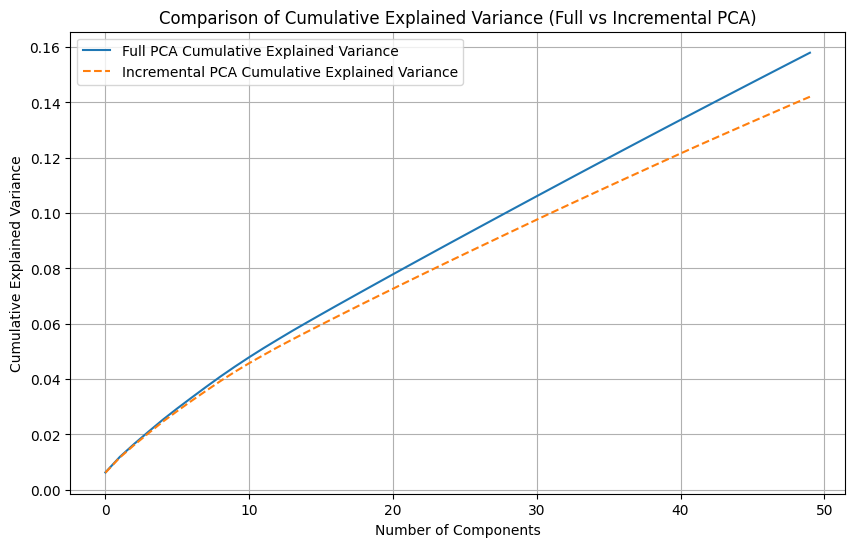

In [75]:
plt.figure(figsize=(10, 6))

plt.plot(np.cumsum(pca_full.explained_variance_ratio_), label = 'Full PCA Cumulative Explained Variance')
plt.plot(np.cumsum(ipca.explained_variance_ratio_), linestyle = '--', label = 'Incremental PCA Cumulative Explained Variance')

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Comparison of Cumulative Explained Variance (Full vs Incremental PCA)')

plt.legend()
plt.grid(True)
plt.show()

In [76]:
print(f"- Full PCA (exact SVD) processed the data in {time_full:.4f} seconds.")
print(f"- Incremental PCA (batch-wise) processed the data in {time_ipca:.4f} seconds.")

- Full PCA (exact SVD) processed the data in 1.0596 seconds.
- Incremental PCA (batch-wise) processed the data in 3.3400 seconds.


## When to Use Which PCA Variant?

#### Standard PCA (Linear PCA):

 `When to Use`: Data has a `linear structure` and fits entirely in memory.Need a general-purpose dimensionality reduction, feature 
  extraction, or data compression tool.

  `Why`: It's the most common and computationally straightforward when its assumptions hold.

--- 
#### Kernel PCA:

`When to Use : Data exhibits `non-linear` relationships or patterns that cannot be captured by linear projections (e.g., concentric   
 circles, spirals).

`Why`: It projects data into a `higher-dimensional space` where non-linear relationships can become linear, effectively handling complex 
 structures.

--- 

#### Sparse PCA:

`When to Use`: Require interpretable principal components that are based on only a few of the original features. Useful for high-dimensional data where we want to `identify key contributing features`.

`Why`: It enforces `sparsity` in the component loadings, making it easier to understand the meaning of each component and implicitly 
 performing feature selection.

--- 

#### Randomized PCA:

`When to Use`: Have very `large datasets` (many samples or features) and need a faster, approximate solution for PCA, especially when 
 extracting a relatively small number of components.

`Why`: It leverages randomized algorithms for computational and memory efficiency, significantly speeding up the process for big data.

--- 

#### Incremental PCA (IPCA):
`When to Use`: Dataset is `too large to fit into memory at once`, or you are dealing with `streaming/online data` that arrives in batches.

`Why`: It processes data `incrementally`, allowing PCA on massive datasets with limited RAM and facilitating continuous model updates.